# Initialization

In [ ]:
import numpy as np
%matplotlib inline                                  
import matplotlib.pyplot as plt
from IPython.core.debugger import set_trace         #for debugging 
import seaborn as sns
import sklearn
import pandas as pd
np.random.seed(1234)

# Task 1: Aquire, preprocess, and analyize the data

In [ ]:
from google.colab import files
uploaded = files.upload()
import io
import pandas as pd
import sys 
np.set_printoptions(threshold=sys.maxsize)
df1 = pd.read_csv(io.BytesIO(uploaded['2020_US_weekly_symptoms_dataset.csv']))
df2 = pd.read_csv(io.BytesIO(uploaded['aggregated_cc_by.csv']))

df1 = df1.loc[:, (df1!=0).mean() >= 0.6].fillna(0) #columns having atleast 60% of non-zero data
h_new = df2[['open_covid_region_code', 'region_name', 'date', 'hospitalized_new']].fillna(0) #substituting zero values at NaN
h_new = h_new.iloc[ 56701:68839 , :] #Selecting all US provinces from dataset 2
h_new #printing subset of dataset 2 (only USA Provinces)

provinces = df1['open_covid_region_code'].to_list() #converting column to list from datset 1
provinces = list(set(provinces)) #removing duplicate strings from list
#print(provinces) #printing USA provinces present in datset 1


# forming new datframe 'us_hosp' from 'h_new' that has same USA-provinces as in in df1
us_hosp = h_new.loc[(h_new['open_covid_region_code'] == 'US-AK') | (h_new['open_covid_region_code'] == 'US-ND') | (h_new['open_covid_region_code'] == 'US-DC') | (h_new['open_covid_region_code'] == 'US-DE') | (h_new['open_covid_region_code'] == 'US-SD') | (h_new['open_covid_region_code'] == 'US-ID') | (h_new['open_covid_region_code'] == 'US-NE') | (h_new['open_covid_region_code'] == 'US-NH') | (h_new['open_covid_region_code'] == 'US-RI') | (h_new['open_covid_region_code'] == 'US-WY') | (h_new['open_covid_region_code'] == 'US-WV') | (h_new['open_covid_region_code'] == 'US-HI') | (h_new['open_covid_region_code'] == 'US-NM') | (h_new['open_covid_region_code'] == 'US-ME') | (h_new['open_covid_region_code'] == 'US-MT') | (h_new['open_covid_region_code'] == 'US-VT'),:]
us_hosp.reset_index(drop=True, inplace=True)
us_hosp   

common_provinces_list = []
for region in provinces :
    A = str(region)
    us_hosp_2 = us_hosp.loc[us_hosp['open_covid_region_code'] == A , :]
    us_hosp_2 = us_hosp_2.loc[:, (us_hosp_2!=0).mean() >= 0.6] #
    if us_hosp_2.shape[1] == 4 :
        common_provinces_list.append(A) #Appending USA-Provinces having at least 60% of data for hospitalized_new
#print(common_provinces_list)
#print(len(common_provinces_list))

hosp_final = pd.DataFrame()

# forming hosp_final containing 60% data for hospitalized_new amongst common USA provinces
for items in common_provinces_list :
    B = str(items)
    hosp_final = hosp_final.append(h_new.loc[(h_new['open_covid_region_code'] == B), :])
#print(hosp_final)
    
# hosp_final.to_csv(r'C:\Users\subeg\Desktop\Comp 551\maybe_final.csv')   

symptoms_final = pd.DataFrame()
# forming symptoms_final dataframe from df1 for common USA provinces having hospitalized data of about 60%
for items in common_provinces_list :
    X = str(items)
    symptoms_final = symptoms_final.append(df1.loc[(df1['open_covid_region_code'] == X), :])
symptoms_final.reset_index(drop=True, inplace=True)
symptoms_final
print(symptoms_final)
#converting date column of both dataframes from object to datetime format
symptoms_final.date=pd.to_datetime(symptoms_final.date, utc= True)
hosp_final.date=pd.to_datetime(hosp_final.date, utc= True)
#symptoms_final['date']=pd.to_datetime(symptoms_final['date'], utc= True)
#hosp_final['date']=pd.to_datetime(hosp_final['date'], utc= True)


#setting common start date and end date for common USA provinces
start_date = pd.to_datetime('2020-03-09', utc= True)
end_date = pd.to_datetime('2020-09-21', utc= True)


symptoms_final = symptoms_final.loc[(symptoms_final['date'] >= start_date) & (symptoms_final['date'] <= end_date)]
symptoms_final.reset_index(drop=True, inplace=True)
symptoms_final

hosp_final = hosp_final.loc[(hosp_final['date'] >= start_date) & (hosp_final['date'] <= end_date)]
hosp_final.reset_index(drop=True, inplace=True)
hosp_final

# Converting daily resolution to weekly resolution(as per symptoms_final) in hosp_final
hosp_final = hosp_final.groupby("open_covid_region_code").resample('W-Mon', label= 'right', closed = 'right', on='date').sum().reset_index()

#Forming ordered tuple to sort rows in same order amongst symptoms_final and hosp_final
ordered_provinces = tuple(common_provinces_list)
ordered_provinces

#Forming final dataframe for symptoms in fixed provincial order
ordered_symptoms = pd.DataFrame()
for items in common_provinces_list :
    X = str(items)
    ordered_symptoms = ordered_symptoms.append(symptoms_final.loc[(symptoms_final['open_covid_region_code'] == X), :])
ordered_symptoms.reset_index(drop=True, inplace=True)
ordered_symptoms

#Forming final dataframe for hospitalized_new in fixed provincial order
ordered_hosp = pd.DataFrame()
for items in common_provinces_list :
    X = str(items)
    ordered_hosp = ordered_hosp.append(hosp_final.loc[(hosp_final['open_covid_region_code'] == X), :])
ordered_hosp.reset_index(drop=True, inplace=True)
ordered_hosp

#merging ordered_symptoms and ordered_hosp in 'merger_df' and removing repeated columns
merged_df = pd.concat([ordered_hosp,ordered_symptoms], axis=1).T.drop_duplicates().T

#Changing order of columns in merger_df
merged_df = merged_df[['open_covid_region_code', 'date', 'country_region_code', 'country_region', 'sub_region_1', 'hospitalized_new',
                      'symptom:Angular cheilitis', 'symptom:Aphonia','symptom:Burning Chest Pain', 'symptom:Crackles',
                       'symptom:Dysautonomia', 'symptom:Hemolysis', 'symptom:Laryngitis','symptom:Myoclonus', 'symptom:Rectal pain',
                       'symptom:Rumination','symptom:Shallow breathing', 'symptom:Stridor','symptom:Urinary urgency',
                       'symptom:Ventricular fibrillation','symptom:Viral pneumonia']]
print(merged_df)

#converting dataframe into array 
merged_array = merged_df.values

print(merged_array)

Saving 2020_US_weekly_symptoms_dataset.csv to 2020_US_weekly_symptoms_dataset.csv
Saving aggregated_cc_by.csv to aggregated_cc_by.csv


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


    open_covid_region_code  ... symptom:pancreatitis
0                    US-ID  ...                  0.0
1                    US-ID  ...                  0.0
2                    US-ID  ...                  0.0
3                    US-ID  ...                  0.0
4                    US-ID  ...                  0.0
..                     ...  ...                  ...
337                  US-SD  ...                  0.0
338                  US-SD  ...                  0.0
339                  US-SD  ...                  0.0
340                  US-SD  ...                  0.0
341                  US-SD  ...                  0.0

[342 rows x 430 columns]
    open_covid_region_code  ... symptom:Viral pneumonia
0                    US-ID  ...                     100
1                    US-ID  ...                   95.86
2                    US-ID  ...                   68.63
3                    US-ID  ...                   50.91
4                    US-ID  ...                   34.62
..

# Task 2: Visualize & cluster the data

#Search Frequency in Each Region

[3.202068965517241 1.1617241379310344 4.7044827586206885 5.724482758620689
 4.729655172413793 5.971379310344828 4.2620689655172415 4.634137931034482
 5.7206896551724125 6.606206896551724 5.081724137931035 6.407241379310346
 5.6437931034482745 5.706206896551723 3.76551724137931]


[Text(159.0, 0.5, 'Symptoms'),
 Text(0.5, 24.0, 'Weeks'),
 Text(0.5, 1.0, 'North Dakota: Evolution of Popularity of Various Symptom Over Different Weeks in 2020')]

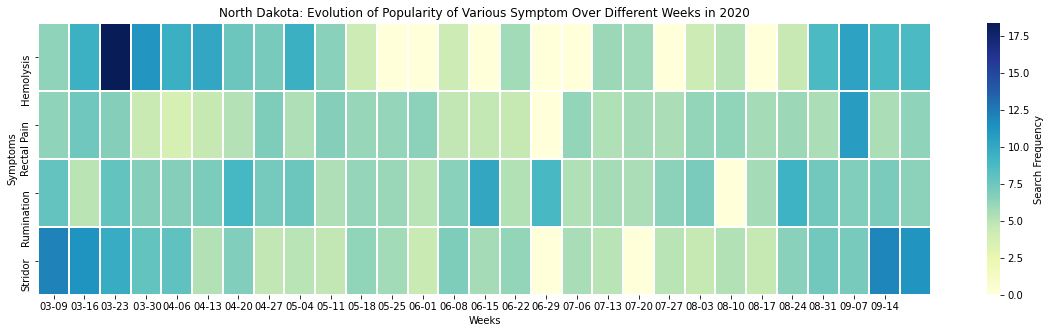

In [ ]:
from matplotlib.pyplot import figure

g1 = np.zeros((29,21), dtype = object)
ind = 0
for i in range(len(merged_array[:,0])):
 if merged_array[i,0] == 'US-ND':
   g1[ind,:] = merged_array[i,:]
   ind += 1

g1m = g1[0:29,6:21].mean(axis=0)
#print(g1m)

g1ylabels = ['Hemolysis','Rectal Pain','Rumination','Stridor']
g1xlabels = ['03-09','03-16','03-23',' 03-30','04-06','04-13','04-20','04-27','05-04',
'05-11','05-18','05-25','06-01','06-08','06-15','06-22','06-29','07-06','07-13',
'07-20','07-27','08-03','08-10','08-17','08-24','08-31','09-07','09-14']
g1hm_df = (g1[0:29,11].tolist(),g1[0:29,14].tolist(),g1[0:29,15].tolist(),g1[0:29,17].tolist())
plt.figure(figsize=(20,5))
g1hm = sns.heatmap(g1hm_df, yticklabels = g1ylabels, xticklabels = g1xlabels, cmap="YlGnBu", linewidths = 1, cbar_kws={'label': 'Search Frequency'})
g1hm.set(title = "North Dakota: Evolution of Popularity of Various Symptom Over Different Weeks in 2020", xlabel = "Weeks", ylabel = "Symptoms")





[Text(159.0, 0.5, 'Symptoms'),
 Text(0.5, 24.0, 'Weeks'),
 Text(0.5, 1.0, 'Rhode Island: Evolution of Popularity of Various Symptoms Over Different Weeks in 2020')]

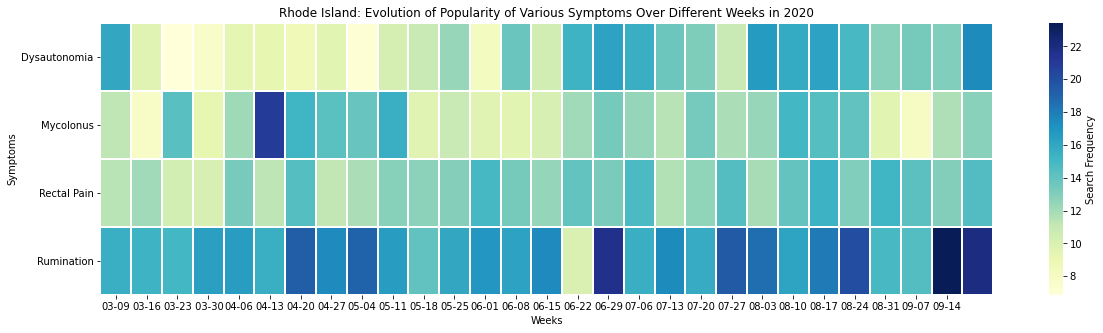

In [ ]:

g2 = np.zeros((29,21), dtype = object)

ind = 0
for i in range(len(merged_array[:,0])):
 if merged_array[i,0] == 'US-RI':
   g2[ind,:] = merged_array[i,:]
   ind += 1

g2m = g2[0:29,6:21].mean(axis=0)
#print(g2m)
g2ylabels = ['Dysautonomia','Mycolonus','Rectal Pain','Rumination']
g2xlabels = ['03-09','03-16','03-23',' 03-30','04-06','04-13','04-20','04-27','05-04',
'05-11','05-18','05-25','06-01','06-08','06-15','06-22','06-29','07-06','07-13',
'07-20','07-27','08-03','08-10','08-17','08-24','08-31','09-07','09-14']
g2hm_df = (g2[0:29,10].tolist(), g2[0:29,13].tolist(), g2[0:29,14].tolist(), g2[0:29,15].tolist())
plt.figure(figsize=(20,5))
g2hm = sns.heatmap(g2hm_df, yticklabels = g2ylabels, xticklabels = g2xlabels, cmap="YlGnBu", linewidths = 1, cbar_kws={'label': 'Search Frequency'})
g2hm.set(title = "Rhode Island: Evolution of Popularity of Various Symptoms Over Different Weeks in 2020", xlabel = "Weeks", ylabel = "Symptoms")


[Text(159.0, 0.5, 'Symptoms'),
 Text(0.5, 24.0, 'Weeks'),
 Text(0.5, 1.0, 'Hawaii: Evolution of Popularity of Various Symptoms Over Different Weeks in 2020')]

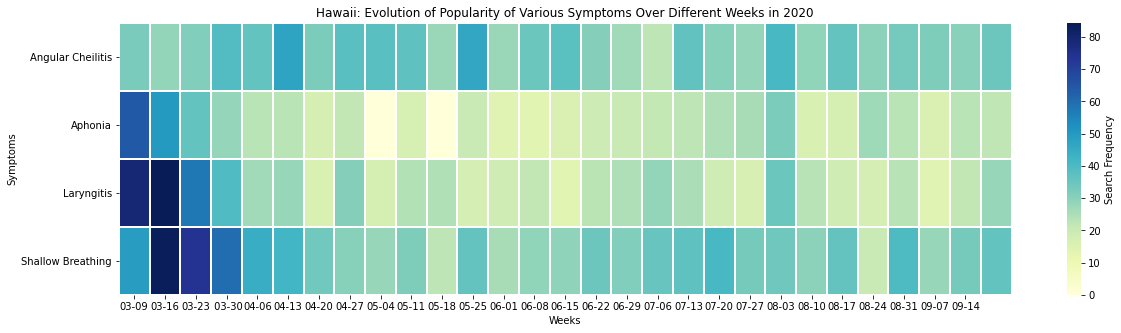

In [ ]:
g3 = np.zeros((29,21), dtype = object)

ind = 0
for i in range(len(merged_array[:,0])):
 if merged_array[i,0] == 'US-HI':
   g3[ind,:] = merged_array[i,:]
   ind += 1

g3m = g3[0:29,6:21].mean(axis=0)
#print(g3m)

g3ylabels = ['Angular Cheilitis','Aphonia','Laryngitis','Shallow Breathing']
g3xlabels = ['03-09','03-16','03-23',' 03-30','04-06','04-13','04-20','04-27','05-04',
'05-11','05-18','05-25','06-01','06-08','06-15','06-22','06-29','07-06','07-13',
'07-20','07-27','08-03','08-10','08-17','08-24','08-31','09-07','09-14']
g3hm_df = (g3[0:29,6].tolist(), g3[0:29,7].tolist(), g3[0:29,12].tolist(), g3[0:29,16].tolist())
plt.figure(figsize=(20,5))
g3hm = sns.heatmap(g3hm_df, yticklabels = g3ylabels, xticklabels = g3xlabels, cmap="YlGnBu", linewidths = 1, cbar_kws={'label': 'Search Frequency'})
g3hm.set(title = "Hawaii: Evolution of Popularity of Various Symptoms Over Different Weeks in 2020", xlabel = "Weeks", ylabel = "Symptoms")


[Text(159.0, 0.5, 'Symptoms'),
 Text(0.5, 24.0, 'Weeks'),
 Text(0.5, 1.0, 'New Hampshire: Evolution of Popularity of Various Symptoms Over Different Weeks in 2020')]

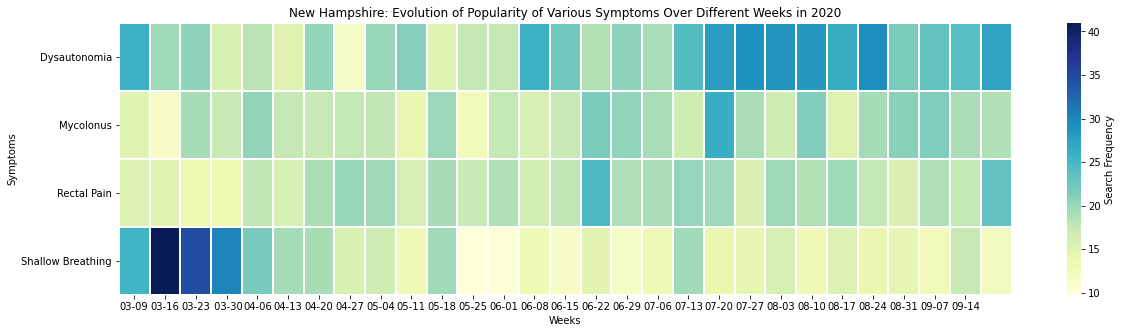

In [ ]:
g4 = np.zeros((29,21), dtype = object)

ind = 0
for i in range(len(merged_array[:,0])):
 if merged_array[i,0] == 'US-NH':
   g4[ind,:] = merged_array[i,:]
   ind += 1

g4m = g4[0:29,6:21].mean(axis=0)
#print(g4m)

g4ylabels = ['Dysautonomia','Mycolonus','Rectal Pain','Shallow Breathing']
g4xlabels = ['03-09','03-16','03-23',' 03-30','04-06','04-13','04-20','04-27','05-04',
'05-11','05-18','05-25','06-01','06-08','06-15','06-22','06-29','07-06','07-13',
'07-20','07-27','08-03','08-10','08-17','08-24','08-31','09-07','09-14']

g4hm_df = (g4[0:29,10].tolist(), g4[0:29,13].tolist(), g4[0:29,14].tolist(), g4[0:29,16].tolist())
plt.figure(figsize=(20,5))
g4hm = sns.heatmap(g4hm_df, yticklabels = g4ylabels, xticklabels = g4xlabels, cmap = "YlGnBu", linewidths = 1, cbar_kws={'label': 'Search Frequency'})
g4hm.set(title = "New Hampshire: Evolution of Popularity of Various Symptoms Over Different Weeks in 2020", xlabel = "Weeks", ylabel = "Symptoms")

[0.0 22.286206896551718 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 25.04137931034483]


[Text(159.0, 0.5, 'Symptoms'),
 Text(0.5, 24.0, 'Weeks'),
 Text(0.5, 1.0, 'New Mexico: Evolution of Popularity of Various Symptoms Over Different Weeks in 2020')]

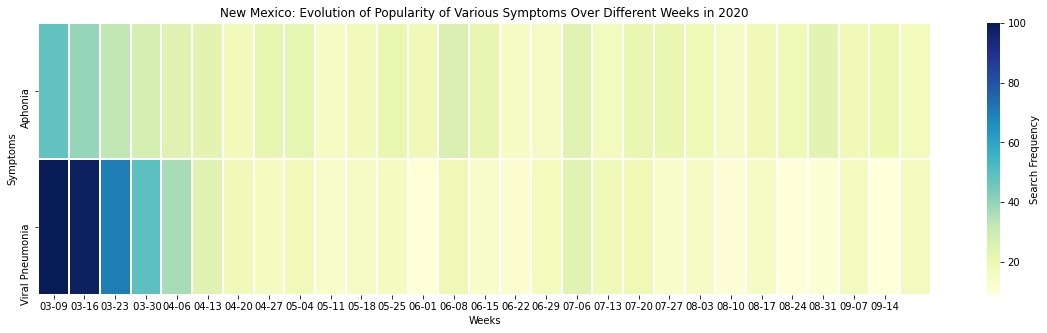

In [ ]:
g5 = np.zeros((29,21), dtype = object)

ind = 0
for i in range(len(merged_array[:,0])):
 if merged_array[i,0] == 'US-NM':
   g5[ind,:] = merged_array[i,:]
   ind += 1

g5m = g5[0:29,6:21].mean(axis=0)
#print(g5m)

g5ylabels = ['Aphonia','Viral Pneumonia']
g5xlabels = ['03-09','03-16','03-23',' 03-30','04-06','04-13','04-20','04-27','05-04',
'05-11','05-18','05-25','06-01','06-08','06-15','06-22','06-29','07-06','07-13',
'07-20','07-27','08-03','08-10','08-17','08-24','08-31','09-07','09-14']
g5hm_df = (g5[0:29,7].tolist(), g5[0:29,20].tolist())
plt.figure(figsize=(20,5))
g5hm = sns.heatmap(g5hm_df, yticklabels = g5ylabels, xticklabels = g5xlabels, cmap = "YlGnBu", linewidths = 1, cbar_kws={'label': 'Search Frequency'})
g5hm.set(title = "New Mexico: Evolution of Popularity of Various Symptoms Over Different Weeks in 2020", xlabel = "Weeks", ylabel = "Symptoms")

[3.6875862068965515 3.775862068965517 6.700344827586207 4.872413793103449
 6.070344827586206 7.2158620689655155 5.80793103448276 5.551379310344827
 6.354137931034483 8.145172413793103 5.963103448275862 7.131034482758621
 6.647931034482759 8.800344827586207 4.273793103448276]


[Text(159.0, 0.5, 'Symptoms'),
 Text(0.5, 24.0, 'Weeks'),
 Text(0.5, 1.0, 'South Dakota: Evolution of Popularity of Various Symptoms Over Different Weeks in 2020')]

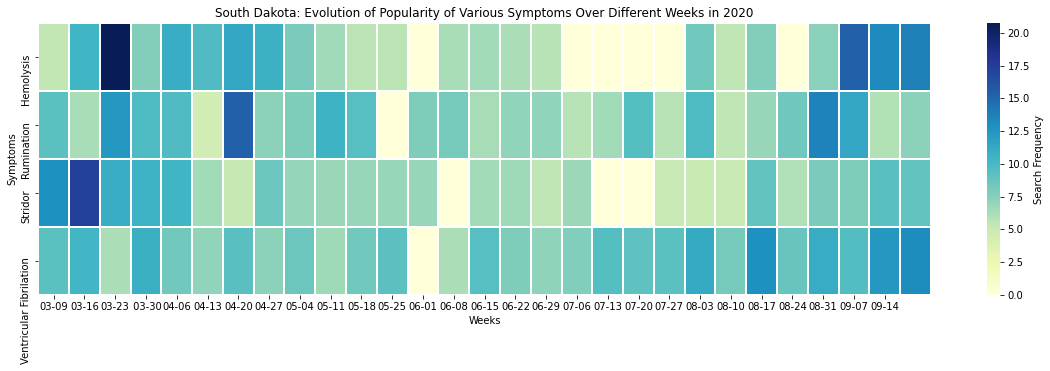

In [ ]:
g6 = np.zeros((29,21), dtype = object)

ind = 0
for i in range(len(merged_array[:,0])):
 if merged_array[i,0] == 'US-SD':
   g6[ind,:] = merged_array[i,:]
   ind += 1

g6m = g6[0:29,6:21].mean(axis=0)
#print(g6m)

g6ylabels = ['Hemolysis','Rumination','Stridor','Ventricular Fibrilation']
g6xlabels = ['03-09','03-16','03-23',' 03-30','04-06','04-13','04-20','04-27','05-04',
'05-11','05-18','05-25','06-01','06-08','06-15','06-22','06-29','07-06','07-13',
'07-20','07-27','08-03','08-10','08-17','08-24','08-31','09-07','09-14']
g6hm_df = (g6[0:29,11].tolist(), g6[0:29,15].tolist(), g6[0:29,17].tolist(), g6[0:29,19].tolist())
plt.figure(figsize=(20,5))
g6hm = sns.heatmap(g6hm_df, yticklabels = g6ylabels, xticklabels = g6xlabels, cmap = "YlGnBu", linewidths = 1, cbar_kws={'label': 'Search Frequency'})
g6hm.set(title = "South Dakota: Evolution of Popularity of Various Symptoms Over Different Weeks in 2020", xlabel = "Weeks", ylabel = "Symptoms")

[0.0 17.70793103448276 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 24.207931034482762]


[Text(159.0, 0.5, 'Symptoms'),
 Text(0.5, 24.0, 'Weeks'),
 Text(0.5, 1.0, 'Idaho: Evolution of Popularity of Various Symptoms Over Different Weeks in 2020')]

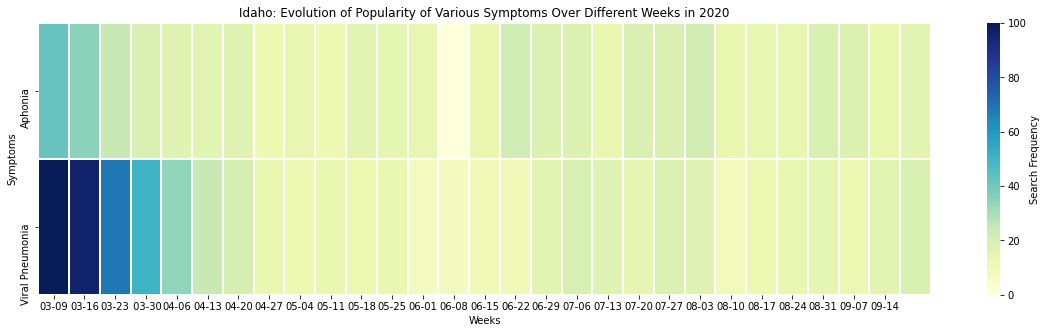

In [ ]:
g7 = np.zeros((29,21), dtype = object)

ind = 0
for i in range(len(merged_array[:,0])):
 if merged_array[i,0] == 'US-ID':
   g7[ind,:] = merged_array[i,:]
   ind += 1

g7m = g7[0:29,6:21].mean(axis=0)
#print(g7m)

g7ylabels = ['Aphonia','Viral Pneumonia']
g7xlabels = ['03-09','03-16','03-23',' 03-30','04-06','04-13','04-20','04-27','05-04',
'05-11','05-18','05-25','06-01','06-08','06-15','06-22','06-29','07-06','07-13',
'07-20','07-27','08-03','08-10','08-17','08-24','08-31','09-07','09-14']
g7hm_df = (g7[0:29,7].tolist(), g7[0:29,20].tolist())
plt.figure(figsize=(20,5))
g7hm = sns.heatmap(g7hm_df, yticklabels = g7ylabels, xticklabels = g7xlabels, cmap = "YlGnBu", linewidths = 1, cbar_kws={'label': 'Search Frequency'})
g7hm.set(title = "Idaho: Evolution of Popularity of Various Symptoms Over Different Weeks in 2020", xlabel = "Weeks", ylabel = "Symptoms")

[Text(159.0, 0.5, 'Symptoms'),
 Text(0.5, 24.0, 'Weeks'),
 Text(0.5, 1.0, 'Montana: Evolution of Popularity of Various Symptoms Over Different Weeks in 2020')]

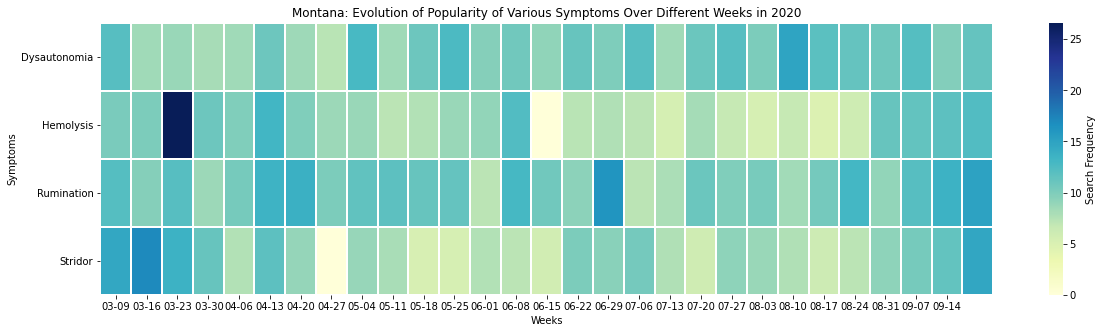

In [ ]:
g8 = np.zeros((29,21), dtype = object)

ind = 0
for i in range(len(merged_array[:,0])):
 if merged_array[i,0] == 'US-MT':
   g8[ind,:] = merged_array[i,:]
   ind += 1

g8m = g8[0:29,6:21].mean(axis=0)
#print(g8m)


g8ylabels = ['Dysautonomia','Hemolysis','Rumination','Stridor']
g8xlabels = ['03-09','03-16','03-23',' 03-30','04-06','04-13','04-20','04-27','05-04',
'05-11','05-18','05-25','06-01','06-08','06-15','06-22','06-29','07-06','07-13',
'07-20','07-27','08-03','08-10','08-17','08-24','08-31','09-07','09-14']
g8hm_df = (g8[0:29,10].tolist(), g8[0:29,11].tolist(), g8[0:29,15].tolist(), g8[0:29,17].tolist())
plt.figure(figsize=(20,5))
g8hm = sns.heatmap(g8hm_df, yticklabels = g8ylabels, xticklabels = g8xlabels, cmap = "YlGnBu", linewidths = 1, cbar_kws={'label': 'Search Frequency'})
g8hm.set(title = "Montana: Evolution of Popularity of Various Symptoms Over Different Weeks in 2020", xlabel = "Weeks", ylabel = "Symptoms")

[Text(159.0, 0.5, 'Symptoms'),
 Text(0.5, 24.0, 'Weeks'),
 Text(0.5, 1.0, 'Maine: Evolution of Popularity of Various Symptoms Over Different Weeks in 2020')]

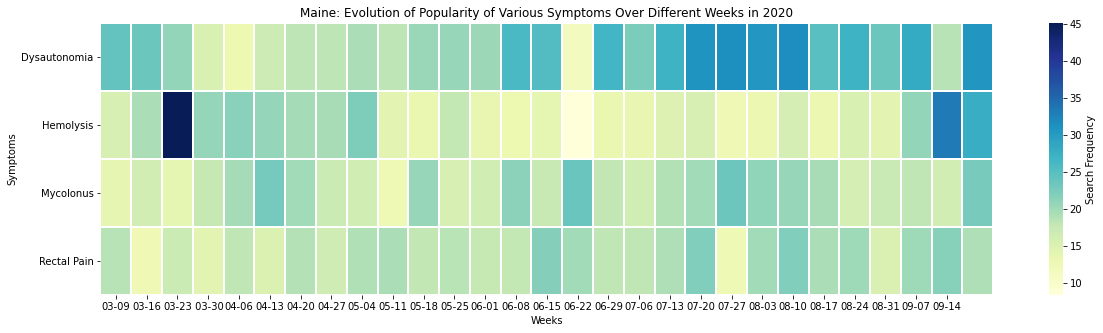

In [ ]:
g9 = np.zeros((29,21), dtype = object)

ind = 0
for i in range(len(merged_array[:,0])):
 if merged_array[i,0] == 'US-ME':
   g9[ind,:] = merged_array[i,:]
   ind += 1

g9m = g9[0:29,6:21].mean(axis=0)
#print(g9m)


g9ylabels = ['Dysautonomia','Hemolysis','Mycolonus','Rectal Pain']
g9xlabels = ['03-09','03-16','03-23',' 03-30','04-06','04-13','04-20','04-27','05-04',
'05-11','05-18','05-25','06-01','06-08','06-15','06-22','06-29','07-06','07-13',
'07-20','07-27','08-03','08-10','08-17','08-24','08-31','09-07','09-14']
g9hm_df = (g9[0:29,10].tolist(), g9[0:29,11].tolist(), g9[0:29,13].tolist(), g9[0:29,14].tolist())
plt.figure(figsize=(20,5))
g9hm = sns.heatmap(g9hm_df, yticklabels = g9ylabels, xticklabels = g9xlabels, cmap = "YlGnBu", linewidths = 1, cbar_kws={'label': 'Search Frequency'})
g9hm.set(title = "Maine: Evolution of Popularity of Various Symptoms Over Different Weeks in 2020", xlabel = "Weeks", ylabel = "Symptoms")

#PCA

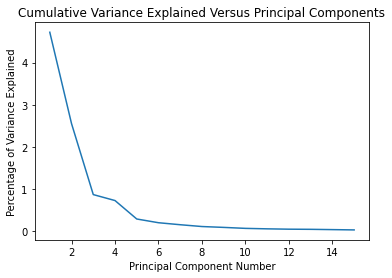

In [ ]:
from sklearn.decomposition import PCA
from sklearn import preprocessing

y =('symptom:Angular cheilitis','symptom:Aphonia','symptom:Burning Chest Pain', 'symptom:Crackles',
    'symptom:Dysautonomia', 'symptom:Hemolysis', 'symptom:Laryngitis','symptom:Myoclonus', 'symptom:Rectal pain',
    'symptom:Rumination','symptom:Shallow breathing', 'symptom:Stridor','symptom:Urinary urgency',
    'symptom:Ventricular fibrillation','symptom:Viral pneumonia')
X = pd.DataFrame(data = merged_array[0:261,6:21], columns = y, index = merged_array[0:261,0])


#print(X.head)
X_scaled = preprocessing.scale(X)

pca1 = PCA()
pca1.fit(X_scaled)
num_of_pc_components = len(pca1.explained_variance_ratio_)

plt.xlabel("Principal Component Number")
plt.ylabel("Percentage of Variance Explained")
plt.title("Cumulative Variance Explained Versus Principal Components")
plt.plot(np.linspace(1,num_of_pc_components,num_of_pc_components),10*pca1.explained_variance_ratio_)



Text(0, 0.5, 'PC 2')

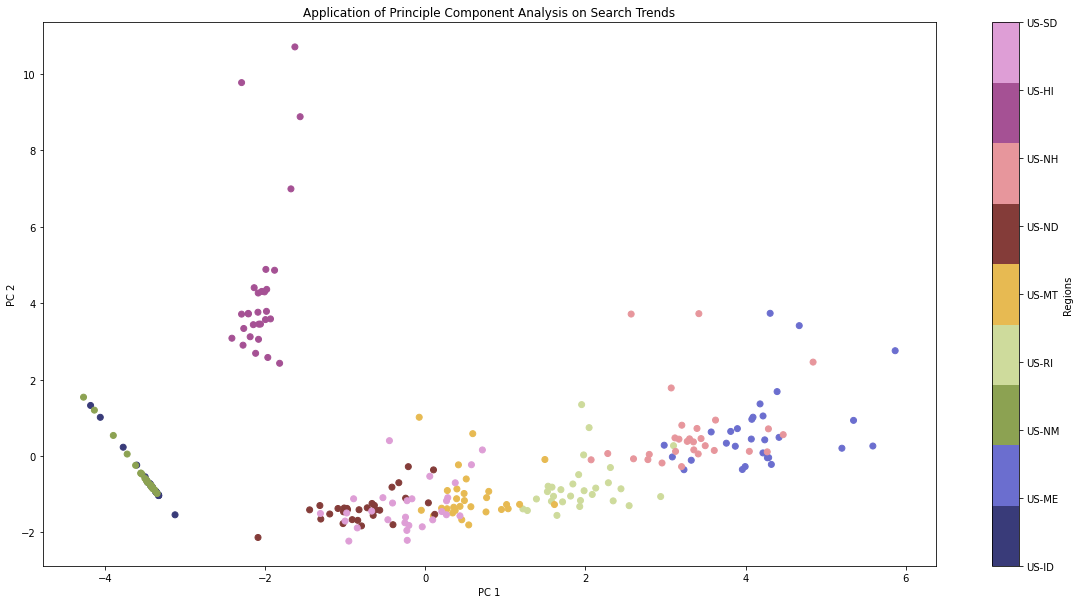

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 5)

pca.fit(X_scaled)
X_reduced = pca.transform(X_scaled)
print()
keys = ['US-ID','US-ME','US-NM','US-RI','US-MT','US-ND','US-NH','US-HI','US-SD']
colors = ('red','blue','green','yellow', 'orange', 'purple', 'brown' ,'cyan','magenta')

y = []
for i in merged_array[:,0]:
  if i == 'US-ID':
    y.append(0)
  if i == 'US-ME':
    y.append(1)
  if i == 'US-NM':
    y.append(2)
  if i == 'US-RI':
    y.append(3)
  if i == 'US-MT':
    y.append(4)
  if i == 'US-ND':
    y.append(5)
  if i == 'US-NH':
    y.append(6)
  if i == 'US-HI':
    y.append(7)
  if i == 'US-SD':
    y.append(8)

plt.figure(figsize=(20,10))
formatter = plt.FuncFormatter(lambda i, *args: keys[int(i)])
plt.scatter(X_reduced[:,0],X_reduced[:,1], c = y, cmap=plt.cm.get_cmap('tab20b',9))
plt.colorbar(ticks=[0,1,2,3,4,5,6,7,8], format=formatter).set_label('Regions')
plt.title('Application of Principle Component Analysis on Search Trends')
plt.xlabel("PC 1")
plt.ylabel("PC 2")

#K-means

Text(0, 0.5, 'PC 2')

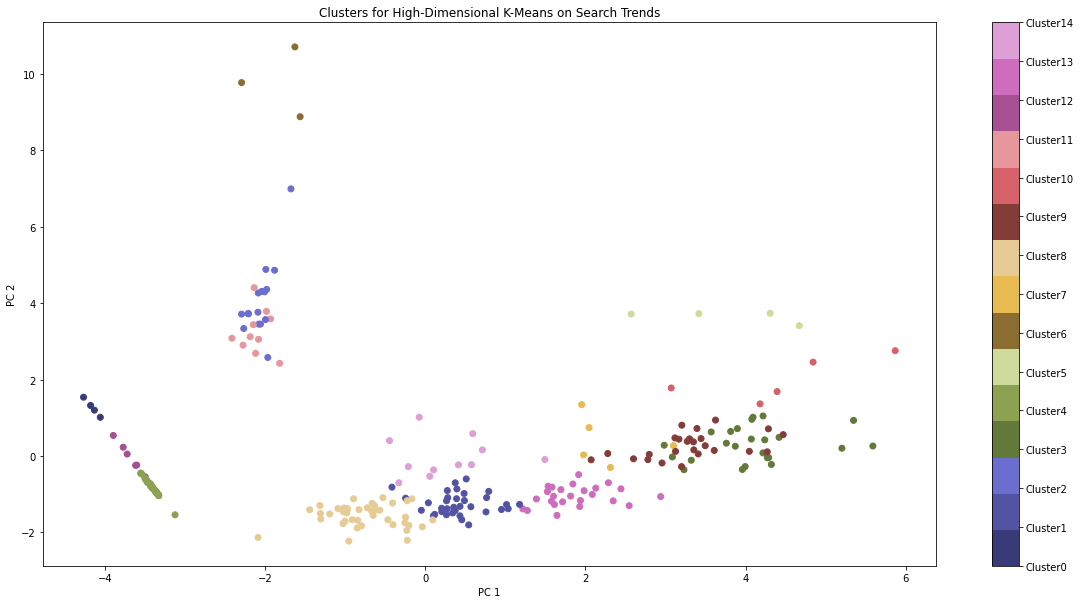

In [ ]:
from sklearn.cluster import KMeans

kmeans_hd = KMeans(n_clusters = 15, random_state = 0)
kmeans_hd.fit(X)
pred_high = kmeans_hd.predict(X)

clustershd = []
for i in range(15):
  clustershd.append('Cluster' + str(i))

formatter = plt.FuncFormatter(lambda i, *args: clustershd[int(i)])


plt.figure(figsize=(20,10))
plt.scatter(X_reduced[:,0],X_reduced[:,1], c=pred_high, cmap = plt.cm.get_cmap('tab20b',15))
plt.title('Clusters for High-Dimensional K-Means on Search Trends')
plt.colorbar(ticks=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14], format=formatter)
plt.xlabel('PC 1')
plt.ylabel('PC 2')


Text(0, 0.5, 'PC 2')

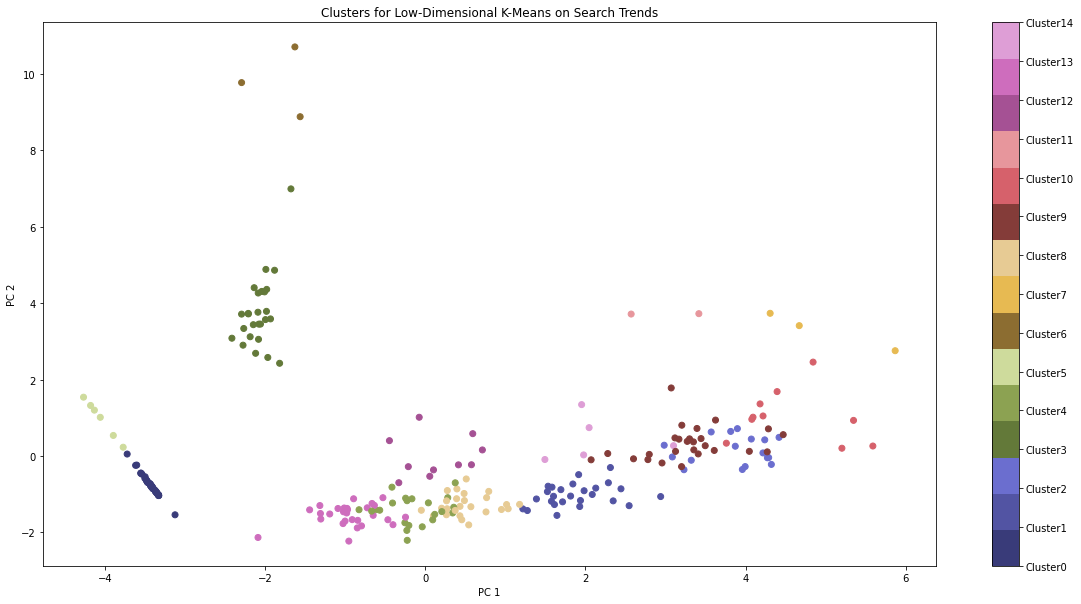

In [ ]:
kmeans_ld = KMeans(n_clusters = 15, random_state = 0)
kmeans_ld.fit(X_reduced)
pred_low = kmeans_ld.predict(X_reduced)

clustersld = []
for i in range(15):
  clustersld.append('Cluster' + str(i))

formatter = plt.FuncFormatter(lambda i, *args: clustersld[int(i)])

plt.figure(figsize=(20,10))
plt.scatter(X_reduced[:,0],X_reduced[:,1], c=pred_low, cmap = plt.cm.get_cmap('tab20b',15))
plt.colorbar(ticks=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14], format=formatter)
plt.title('Clusters for Low-Dimensional K-Means on Search Trends')
plt.xlabel('PC 1')
plt.ylabel('PC 2')

# Task 3: Supervised learning 


In [ ]:
import time

# define a function for the MSE loss
loss = lambda y, yh: np.mean((y-yh)**2)

idxs = list(range(len(merged_array[0])))
#exclude hospitalized_new from input matrix
idxs.pop(5) 
x,y = merged_array[:, idxs], merged_array[:,5]

(num_instances, num_features)= x.shape
num_features -= 5
print("Number of instances,", num_instances, "\nNumber of features:",num_features)

regions = []
for row in x:
  if row[0] not in regions:
    regions.append(row[0])

# num of unique regions
num_region = len(regions)
# num of samples in each region
n_region = num_instances//num_region
print("Number of unique regions", num_region, "\nNumber of samples in each region:",n_region)


# With 9 regions, assigning we set aside 7 for training and 2 for validation
# Since this gives us a 78% training to 22% validation (close to 80,20 split) 
n_valid = n_region * 2

# ------ Region Based Split -------
def shuffle_regions():
  # The idea here is to shuffle the regions and then after the samples within each region.
  region_pos = np.random.permutation(num_region)
  ind = []
  for pos in region_pos:
    temp = np.random.permutation(np.arange(0+n_region*pos,n_region+n_region*pos))
    for e in temp:
      ind.append(e) 
  return ind 


# ------ Time Based Split -------
# Sort x by Timestamp
inds_sorted = x[:,1].argsort() 

# All data after 2020-08-10 for validation
cutoff_date = pd.Timestamp('2020-08-10 00:00:00+0000')
cutoff_ind = np.where(x[inds_sorted] == cutoff_date)[0][0]


Number of instances, 261 
Number of features: 15
Number of unique regions 9 
Number of samples in each region: 29


## KNN

Total Exeuction Time: 0.5257208347320557 seconds


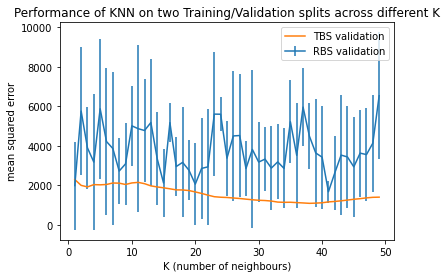

RBS Minimum Mean Error: 1677.82 at index K = 41
TBS Minimum Mean Error: 1091.2 at index K = 38


In [ ]:
from sklearn import neighbors

# ----- Region Based Split (RBS) -----
num_folds = 5

inds = shuffle_regions()

# x train and y train should exclude first 5 columns (only include features)
x_train, y_train = x[inds[n_valid:],5:], y[inds[n_valid:]]
x_valid, y_valid = x[inds[:n_valid],5:], y[inds[:n_valid]]

# ----- Time Based Split (TBS) -----

x2_train, y2_train = x[inds_sorted[:cutoff_ind],5:], y[inds_sorted[:cutoff_ind]]
x2_valid, y2_valid = x[inds_sorted[cutoff_ind:],5:], y[inds_sorted[cutoff_ind:]]

# ----- Compare Two Splits -----
start_time = time.time()
K_list = range(1,50)
err_valid, err2_valid = np.zeros((len(K_list), num_folds)), np.zeros(len(K_list))
for i, K in enumerate(K_list):
  # Cross Validation for RBS
  for f in range(num_folds):
    # Recievce shuffled indicies which keep regions together
    inds = shuffle_regions()

    # Find new training and validation based on new indices
    x_train, y_train = x[inds[n_valid:],5:], y[inds[n_valid:]]
    x_valid, y_valid = x[inds[:n_valid],5:], y[inds[:n_valid]]
    
    # Fit & Predict to KNN
    knn = neighbors.KNeighborsRegressor(n_neighbors=K)
    knn = knn.fit(x_train, y_train)
    err_valid[i,f] = loss(y_valid,knn.predict(x_valid))

  # TBS
  knn2 = neighbors.KNeighborsRegressor(n_neighbors=K)
  knn2 = knn2.fit(x2_train, y2_train)
  err2_valid[i] = loss(y2_valid,knn2.predict(x2_valid))


# Show time to train
print("Total Exeuction Time: %s seconds" % (time.time() - start_time))

# Visualize Mean Squared Error across different values of K
plt.title("Performance of KNN on two Training/Validation splits across different K")
plt.errorbar(K_list, np.mean(err_valid, axis=1), np.std(err_valid, axis=1), label='RBS validation')
plt.plot(K_list, err2_valid,  label='TBS validation')
plt.legend()
plt.xlabel('K (number of neighbours)')
plt.ylabel('mean squared error')
plt.show()

# Find best choice for K
min_mean_err = min(np.mean(err_valid, axis=1))
min_mean_err2 = min(err2_valid)
# ! ---------- Could be redone --------------- !
for i in range(len(err_valid)):
  if (np.mean(err_valid[i]) == min_mean_err):
    K_star = i+1
K2_star = np.where(err2_valid == min_mean_err2)[0][0] + 1
print("RBS Minimum Mean Error:",round(min_mean_err,2),"at index K =",K_star)
print("TBS Minimum Mean Error:",round(min_mean_err2,2),"at index K =",K2_star)


## Decision Tree

Total Exeuction Time: 0.23897218704223633 seconds


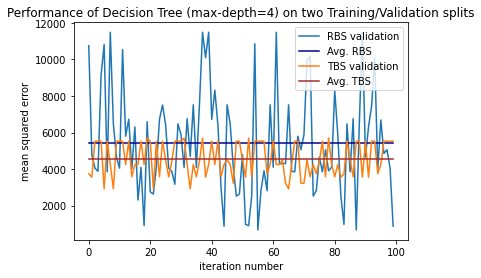

Average RBS Mean Square Error: 5439.76
Average TBS Mean Square Error: 4574.81


In [ ]:
from sklearn import tree 
from sklearn.metrics import accuracy_score
# if the number of leaf nodes in a full binary tree of height h is 2^h
#md = int(np.log2(num_instances))
md = 4
num_loops = 100
# ----- Region Based Split (RBS) -----
inds = shuffle_regions()

# x train and y train should exclude first 5 columns (only include features)
x_train, y_train = x[inds[n_valid:],5:], y[inds[n_valid:]]
x_valid, y_valid = x[inds[:n_valid],5:], y[inds[:n_valid]]

# ----- Time Based Split (TBS) -----
x2_train, y2_train = x[inds_sorted[:cutoff_ind],5:], y[inds_sorted[:cutoff_ind]]
x2_valid, y2_valid = x[inds_sorted[cutoff_ind:],5:], y[inds_sorted[cutoff_ind:]]

# ----- Compare Two Splits -----
start_time = time.time()
# Mean Square Error seems to be highly volitile, lets create num_loop decision trees and average out their mse
err, err2 = np.zeros(num_loops), np.zeros(num_loops)
for i in range(num_loops):
  #RBS
  # Select new regions to train from
  inds = shuffle_regions()
  x_train, y_train = x[inds[n_valid:],5:], y[inds[n_valid:]]
  x_valid, y_valid = x[inds[:n_valid],5:], y[inds[:n_valid]]

  dt = tree.DecisionTreeRegressor(max_depth = md)
  dt.fit(x_train, y_train)

  err[i] = loss(y_valid,dt.predict(x_valid))
  
  # TBS
  dt2 = tree.DecisionTreeRegressor(max_depth = md)
  dt2.fit(x2_train, y2_train)
  
  err2[i] = loss(y2_valid,dt2.predict(x2_valid))

# Show time to train
print("Total Exeuction Time: %s seconds" % (time.time() - start_time))

# Visualize Mean Squared Error
plt.title(f"Performance of Decision Tree (max-depth={md}) on two Training/Validation splits")
plt.plot(range(num_loops), err,  label='RBS validation')
plt.plot(range(num_loops), np.full(err.shape,np.mean(err)), label="Avg. RBS",color='darkblue')
plt.plot(range(num_loops), err2,  label='TBS validation')
plt.plot(range(num_loops), np.full(err2.shape,np.mean(err2)), label="Avg. TBS",color='brown')
plt.legend()
plt.xlabel('iteration number')
plt.ylabel('mean squared error')
plt.show()

print('Average RBS Mean Square Error:',round(np.mean(err),2))
print('Average TBS Mean Square Error:',round(np.mean(err2),2))

## Mask Use

                  NEVER  hospitalized_new  population
Hawaii         0.016200              14.0     1416000
Idaho          0.103773             165.0     1787000
Maine          0.047500              25.0     1344000
Montana        0.150857              33.0     1069000
New Hampshire  0.055100              24.0     1360000
New Mexico     0.042182             339.0     2097000
North Dakota   0.180981              50.0      762062
Rhode Island   0.012200              71.0     1059000
South Dakota   0.148318              85.0      884659
                  NEVER  ...  hospitalized_new / population
Hawaii         0.016200  ...                       0.000010
Idaho          0.103773  ...                       0.000092
Maine          0.047500  ...                       0.000019
Montana        0.150857  ...                       0.000031
New Hampshire  0.055100  ...                       0.000018
New Mexico     0.042182  ...                       0.000162
North Dakota   0.180981  ...            

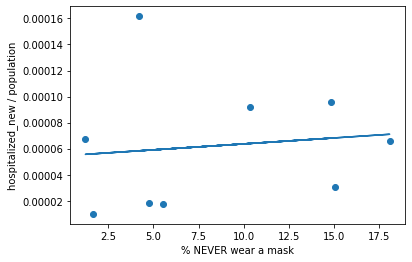

In [ ]:
#from google.colab import files
#uploaded = files.upload()

import io
import pandas as pd

df3 = pd.read_csv(io.BytesIO(uploaded['mask-use-by-county.csv'])).fillna(0)
df3 = df3.loc[(df3['State'] == 'New Hampshire') | (df3['State'] == 'North Dakota') | (df3['State'] == 'Montana') | (df3['State'] == 'Hawaii') | (df3['State'] == 'South Dakota') | (df3['State'] == 'Idaho') | (df3['State'] == 'New Mexico') | (df3['State'] == 'Maine') | (df3['State'] == 'Rhode Island')  , df3.columns[1:3] ]
grouped_mask = df3.groupby('State')
grouped_mask_mean = grouped_mask.mean()

# forming df4 from merged_df from start and end date of masked survey
survey_start_date = pd.to_datetime('2020-07-6', utc= True)
survey_end_date = pd.to_datetime('2020-07-13', utc= True)
df4 = merged_df.loc[(merged_df['date'] >= survey_start_date) & (merged_df['date'] <= survey_end_date) , merged_df.columns[0:6]]
df4['hospitalized_new'] = df4['hospitalized_new'].astype(float)

#grouping df4 by sub_region_1
grouped_hosp = df4.groupby('sub_region_1')
grouped_hosp_sum = grouped_hosp.sum()

#merging mask and hospitalised data sub sets
merged_mask_hosp = pd.concat([grouped_mask_mean,grouped_hosp_sum], axis=1).T.drop_duplicates().T
# Data from the US Census Bureau
merged_mask_hosp['population'] = [1416000,1787000,1344000,1069000,1360000,2097000,762062,1059000,884659]
print(merged_mask_hosp)
merged_mask_hosp['hospitalized_new / population'] = np.divide(merged_mask_hosp['hospitalized_new'],merged_mask_hosp['population'])
print(merged_mask_hosp)
m, b = np.polyfit(merged_mask_hosp['NEVER']*100, merged_mask_hosp['hospitalized_new / population'], 1)
#display a scatter plot
plt.scatter(merged_mask_hosp['NEVER']*100,merged_mask_hosp['hospitalized_new / population'])
plt.plot(merged_mask_hosp['NEVER']*100, m*merged_mask_hosp['NEVER']*100+b)
plt.xlabel('% NEVER wear a mask')
plt.ylabel('hospitalized_new / population')
plt.show()



#sum_all_hosp =  merged_df.loc[ : , merged_df.columns[4:6]]
#grouped_sum_all_hosp = sum_all_hosp.groupby('sub_region_1').sum()
#merged_mask_hosp_percent = pd.concat([merged_mask_hosp,grouped_sum_all_hosp], axis=1).T.drop_duplicates().T
#merged_mask_hosp_percent.columns = ['NEVER', 'hospitalized_new', 'total_hospitalized_new']
#merged_mask_hosp_percent['hosp_percent'] = (merged_mask_hosp_percent['hospitalized_new'] / 
#                  merged_mask_hosp_percent['total_hospitalized_new']) * 100
#print(merged_mask_hosp_percent)
